In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
def parse_fasta(fasta_file):
    # returns records as list of [id, seq]
    records = []
    
    with open(fasta_file) as f:
            last_record = ""

            for line in f:
                if line[:1] == '>':
                    if len(last_record) > 0:
                        records.append(last_record.split(','))                    
                    last_record = line.strip() + ','
                else:
                    last_record += line.strip()
                    
            if len(last_record) > 0:
                records.append(last_record.split(','))                    

    return records

In [28]:
records = parse_fasta('../data/raw/ha/CdsFastaResults_complete_only.fasta')
flu_df = pd.DataFrame.from_records(records)
flu_df.columns = ['id', 'seq']

flu_df.seq.str.len().value_counts()

1701    50
Name: seq, dtype: int64

All the sequences are the same length. Using MUSCLE to align found no differences.

In [17]:
flu_df.head()

,id,seq
0,>gb:KM064172:1-1701|Organism:Influenza A virus...,ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
1,>gb:KM064026:1-1701|Organism:Influenza A virus...,ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
2,>gb:KM064441:1-1701|Organism:Influenza A virus...,ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
3,>gb:KM064095:1-1701|Organism:Influenza A virus...,ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
4,>gb:KM064092:1-1701|Organism:Influenza A virus...,ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...


In [21]:
# convert the seq to a matrix
seq_mat = np.array(list(flu_df.seq.apply(list)))

In [23]:
np.unique(seq_mat)

array(['A', 'C', 'G', 'M', 'R', 'T', 'W'], dtype='<U1')

In [24]:
# covert the seq to a df
seq_df = pd.DataFrame(seq_mat)

seq_desc = seq_df.describe()
seq_desc

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
count,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
unique,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
top,A,T,G,A,A,G,A,C,T,A,...,T,T,G,C,A,T,T,T,G,A
freq,50,50,50,50,50,50,50,50,47,50,...,50,50,50,50,50,50,50,50,50,50


In [25]:
# the most frequent value at each position
top = np.array(seq_desc.loc['top'])
top

array(['A', 'T', 'G', ..., 'T', 'G', 'A'], dtype=object)

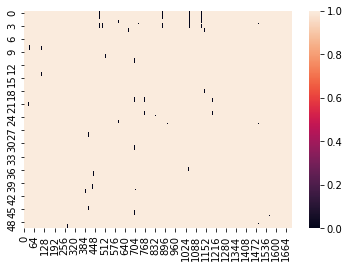

In [26]:
# map of where a sequence differs form the most common nucleotide
sns.heatmap(seq_mat == top);

In [21]:
# count of how many differences exist
seq_desc.loc['unique'].value_counts()

1    1546
2     148
3       7
Name: unique, dtype: int64

In [33]:
# get just the positions where there are differences
diff_cols = seq_df.nunique() > 2
seq_df.loc[:,diff_cols].apply(pd.value_counts)

,466,602,698,703,720,1157,1295
A,NaN,1.0,1.0,3.0,43.0,NaN,35.0
C,1.0,NaN,46.0,45.0,NaN,1.0,NaN
G,NaN,47.0,NaN,NaN,5.0,1.0,NaN
R,NaN,NaN,NaN,NaN,1.0,NaN,NaN
T,47.0,1.0,2.0,NaN,NaN,47.0,13.0
W,1.0,NaN,NaN,1.0,NaN,NaN,1.0
